### Turing patterns replication using multiple iterations of simple computer vision filters

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import ipywidgets as wd



### Define some simple kernels

In [2]:
sharpen = np.array([(-0.5,-1.0,-0.5),
                    (-1.0,7.0,-1.0),
                    (-0.5,-1.0,-0.5)])

blur = np.array([(1/9,1/9,1/9),
                    (1/9,1/9,1/9),
                    (1/9,1/9,1/9)])
blur2 = np.full((5,5), 1/25)
blur3 = np.full((7,7), 1/49)

sobelV = np.array([(-0.125, 0.0, 0.125),(-0.25,0.0,0.25), (-0.125, 0.0, 0.125)])
sobelH = np.array([(-0.125, 0.0, 0.125),(-0.25,0.0,0.25), (-0.125, 0.0, 0.125)]).T # transpuesta
sobelD = np.array([(-0.125, -0.25, 0.0),
                   (-0.25, 0.0, 0.25), 
                   (0.0, 0.25, 0.125)])


### Repeat sharpen-blur filters on image up until n iterations of each

In [44]:
n = 100
from tqdm import tqdm

image = cv2.imread("circon.jpg",1)  
image = image[0:200,0:200,:]
for i in tqdm(range(n)):
    image = cv2.filter2D(image, -1, blur) 
    image = cv2.filter2D(image, -1, sharpen)

    cv2.imwrite(f"results/imagen-{i}.jpg", image)


100%|██████████| 100/100 [00:02<00:00, 42.90it/s]


In [42]:
def plot_n_imgs(imgs):
    """Plot list of images given as list of paths as strings given in imgs list"""
    fig, axs = plt.subplots(1,len(imgs), figsize=(15,9))
    for i, ax in enumerate(axs):
        img = cv2.imread("results/"+imgs[i],1)
        ax.imshow(img)
        ax.title.set_text(imgs[i])
        ax.axis('off')
    plt.show()

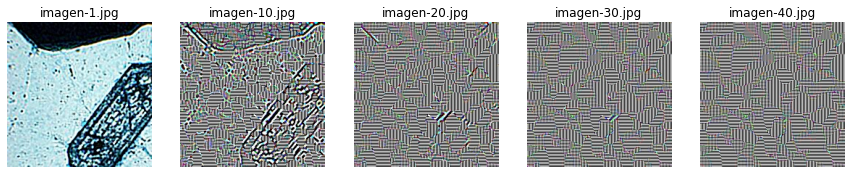

In [43]:
plot_n_imgs(["imagen-1.jpg", "imagen-10.jpg", "imagen-20.jpg", "imagen-30.jpg", "imagen-40.jpg"])

### Interactive visualization using ipywidgets

In [24]:
from ipywidgets import interact, interactive, fixed, interact_manual

@interact(i=(0,100,1))
def show_img(i=1):
    image = cv2.imread(f"results/imagen-{i}.jpg",1)  
    plt.imshow(image)

interactive(children=(IntSlider(value=1, description='i'), Output()), _dom_classes=('widget-interact',))